In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# load data
df = pd.read_parquet('2_after_feature_extraction/feature_matrix_media_calc.parquet')

In [11]:
# keep only css features
df_fp = df.drop(columns=['session_id'])
df_fp = df_fp[df_fp.columns[df_fp.columns.str.contains('css:')]]

# remove user agent from the mix
df_fp = df_fp[df_fp.columns[~df_fp.columns.str.contains('User-Agent')]]

In [12]:
# Convert each row to tuple so we can count duplicates
fingerprint_hashes = df_fp.apply(lambda row: tuple(row), axis=1)

In [13]:
# Count unique vs duplicates
total = len(fingerprint_hashes)
unique = fingerprint_hashes.nunique()
duplicates = total - unique
collision_rate = duplicates / total

In [14]:
print(f"All features:")
print(f"- Total fingerprints: {total}")
print(f"- Unique fingerprints: {unique}")
print(f"- Collision rate: {collision_rate:.4f} ({duplicates} collisions)")

All features:
- Total fingerprints: 922
- Unique fingerprints: 239
- Collision rate: 0.7408 (683 collisions)


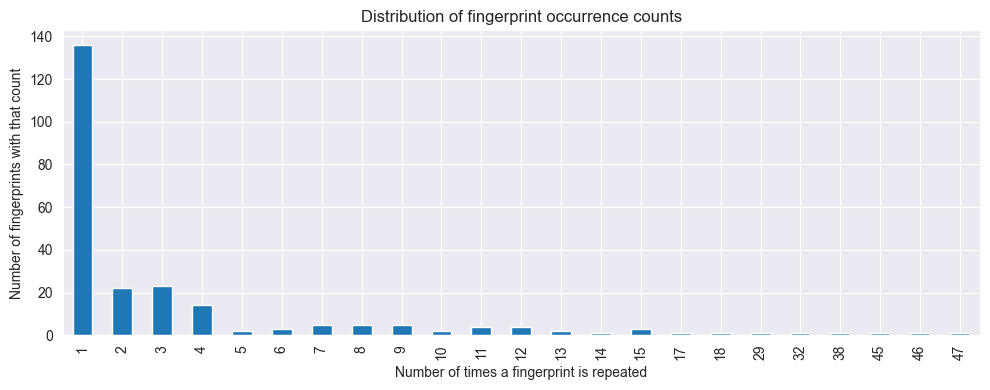

In [15]:
fp_counts = fingerprint_hashes.value_counts()
plt.figure(figsize=(10, 4))
fp_counts.value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of fingerprint occurrence counts")
plt.xlabel("Number of times a fingerprint is repeated")
plt.ylabel("Number of fingerprints with that count")
plt.tight_layout()
plt.show()

In [16]:
# check which session_ids have the same fingerprint
df['fingerprint'] = fingerprint_hashes

duplicate_groups = df.groupby('fingerprint')['session_id'].apply(list)

duplicate_groups = duplicate_groups[duplicate_groups.apply(len) > 1]

print(f"Found {len(duplicate_groups)} duplicate fingerprints:")
for i, (fp, sessions) in enumerate(duplicate_groups.items(), 1):
    print(f"\nDuplicate Group {i}:")
    print(f"- Fingerprint: {fp}")
    print(f"- Session IDs: {sessions}")

Found 103 duplicate fingerprints:

Duplicate Group 1:
- Fingerprint: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 136, 190, 166, 732, 175, 1100, 126, 6970, 129, 81, 130, 78, 189, 403, 110, 133, 100, 600, 164, 170, 126, 550, 78, 585, 115, 650, '', 1, 32, 3, 17, 128, 0, 68, 20, 1, 8, 5, '1', 8, 9, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, '001101000010100')
- Session IDs: ['5e013535-82bf-4512-baed-8649c1f8b416', '6e9a7801-3cbb-4222-a773-1645ab9f875b', '7a820a5e-a6ed-458a-9e44-415864e3cc8f', '8974c3e2-5ee2-46ad-b58c-ba2bf5b7f780', 'a136391c-e7c9-40f0-824d-8ff9363964ce', 'a226a935-3a04-4dec-b5ef-422aea13a319', 'd1b45239-3200-450b-be1c-c69c86d6202c', 'e2622fcf-e3a7-45af-8cb6-72905ba0e355', 'e613d379-2ae6-47c4-9b3f-f1490ee2d065']

Duplicate Group 2:
- Fingerprint: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 136, 190, 166, 732, 175, 1100, 126, 6970, 129, 81, 130, 78, 189, 403, 110, 133, 100, 600, 164, 170, 126, 550, 78, 585, 115, 650, '', 1, 32, 3, 17, 128, 0, 68, 20, 1, 8, 5, '1', 9, 9